In [2]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import datasets,linear_model
>>> from sklearn.metrics import mean_squared_error,r2_score
>>> diabetes=datasets.load_diabetes()
>>> diabetes_X=diabetes.data[:,np.newaxis,2]


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [8]:
>>> diabetes_X_train=diabetes_X[:-30] #splitting data into training and test sets
>>> diabetes_X_test=diabetes_X[-30:]
>>> diabetes_y_train=diabetes.target[:-30] #splitting targets into training and test sets
>>> diabetes_y_test=diabetes.target[-30:]
>>> regr=linear_model.LinearRegression() #Linear regression object
>>> regr.fit(diabetes_X_train,diabetes_y_train) #Use training sets to train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
>>> diabetes_y_pred=regr.predict(diabetes_X_test) #Make predictions
>>> regr.coef_

array([941.43097333])

In [11]:
>>> mean_squared_error(diabetes_y_test,diabetes_y_pred)

3035.0601152912686

In [12]:
>>> r2_score(diabetes_y_test,diabetes_y_pred) #Variance score

0.41092072813583513

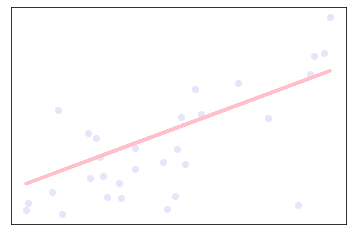

In [14]:
>>> plt.scatter(diabetes_X_test,diabetes_y_test,color ='lavender')
>>> plt.plot(diabetes_X_test,diabetes_y_pred,color='pink',linewidth=3)
>>> plt.xticks(())
>>> plt.yticks(())
>>> plt.show()

In [18]:
import numpy as np
import pandas as pd

In [25]:
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.tree import DecisionTreeClassifier
>>> from sklearn.metrics import accuracy_score, confusion_matrix
>>> from sklearn.metrics import classification_report
>>> def importdata(): #Importing data
        balance_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+
        'databases/balance-scale/balance-scale.data',
        sep= ',', header = None)
        print(len(balance_data))
        print(balance_data.shape)
        print(balance_data.head())
        return balance_data
>>> def splitdataset(balance_data): #Splitting data
        x=balance_data.values[:,1:5]
        y=balance_data.values[:,0]
        x_train,x_test,y_train,y_test=train_test_split(
        x,y,test_size=0.3,random_state=100)
        return x,y,x_train,x_test,y_train,y_test
>>> def train_using_gini(x_train,x_test,y_train): #Training with giniIndex
        clf_gini = DecisionTreeClassifier(criterion = "gini",
        random_state = 100,max_depth=3, min_samples_leaf=5)
        clf_gini.fit(x_train,y_train)
        return clf_gini
>>> def train_using_entropy(x_train,x_test,y_train): #Training with entropy
        clf_entropy=DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 3, min_samples_leaf = 5)
        clf_entropy.fit(x_train,y_train)
        return clf_entropy
>>> def prediction(x_test,clf_object): #Making predictions
        y_pred=clf_object.predict(x_test)
        print(f"Predicted values: {y_pred}")
        return y_pred
>>> def cal_accuracy(y_test,y_pred): #Calculating accuracy
        print(confusion_matrix(y_test,y_pred))
        print(accuracy_score(y_test,y_pred)*100)
        print(classification_report(y_test,y_pred))
>>> data=importdata()

625
(625, 5)
   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [23]:
>>> x,y,x_train,x_test,y_train,y_test=splitdataset(data)
>>> clf_gini=train_using_gini(x_train,x_test,y_train)
>>> clf_entropy=train_using_entropy(x_train,x_test,y_train)
>>> y_pred_gini=prediction(x_test,clf_gini)

Predicted values: ['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']


In [26]:
>>> cal_accuracy(y_test,y_pred_gini)

[[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
73.40425531914893
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
>>> y_pred_entropy=prediction(x_test,clf_entropy)

Predicted values: ['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']


In [28]:
>>> cal_accuracy(y_test,y_pred_entropy)

[[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
70.74468085106383
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes 

In [29]:
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.naive_bayes import MultinomialNB
>>> from sklearn import datasets
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> iris=datasets.load_iris()
>>> x=iris.data
>>> y=iris.target
>>> x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
>>> gnb=GaussianNB()
>>> mnb=MultinomialNB()
>>> y_pred_gnb=gnb.fit(x_train,y_train).predict(x_test)
>>> cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
>>> cnf_matrix_gnb

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

In [30]:
>>> y_pred_mnb = mnb.fit(x_train, y_train).predict(x_test)
>>> cnf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
>>> cnf_matrix_mnb

array([[16,  0,  0],
       [ 0,  0, 18],
       [ 0,  0, 11]])

### KNN 

In [31]:
>>> from sklearn.datasets import load_iris
>>> iris=load_iris()
>>> x=iris.data
>>> y=iris.target
>>> from sklearn.linear_model import LogisticRegression
>>> logreg=LogisticRegression()
>>> logreg.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
>>> logreg.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
>>> y_pred=logreg.predict(x)
>>> len(y_pred)

150

In [34]:
>>> from sklearn import metrics
>>> metrics.accuracy_score(y,y_pred)

0.9733333333333334

In [35]:
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn=KNeighborsClassifier(n_neighbors=5)
>>> knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
>>> y_pred=knn.predict(x)
>>> metrics.accuracy_score(y,y_pred)

0.9666666666666667

In [39]:
>>> x.shape
>>> from sklearn.model_selection import train_test_split
>>> x.shape
>>> y.shape

(150,)

In [42]:
>>> from sklearn.model_selection import train_test_split
>>> x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)
>>> x_train.shape
x_test.shape,y_train.shape,y_test.shape

((60, 4), (90,), (60,))

In [43]:
>>> logreg=LogisticRegression()
>>> logreg.fit(x_train,y_train)
>>> y_pred=knn.predict(x_test)
>>> metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

In [44]:
>>> knn=KNeighborsClassifier(n_neighbors=5)
>>> knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
>>> y_pred=knn.predict(x_test)
>>> metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

In [46]:
>>> k_range=range(1,26)
>>> scores=[]
>>> for k in k_range:
         knn = KNeighborsClassifier(n_neighbors=k)
         knn.fit(x_train, y_train)
         y_pred = knn.predict(x_test)
         scores.append(metrics.accuracy_score(y_test, y_pred))
>>> scores

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

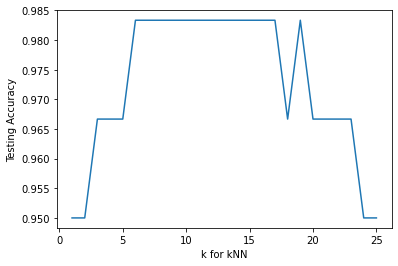

In [47]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(k_range,scores)
>>> plt.xlabel('k for kNN')
>>> plt.ylabel('Testing Accuracy')
>>> plt.show()

In [ ]:
import urllib
url = "http://aima.cs.berkeley.edu/data/iris.csv"
set1 = urllib.request.Request(url)
iris_p = urllib.request.urlopen(set1)
iris_other = pd.read_csv(iris_p, sep=',', decimal='.',
header=None, names= ['sepal_length', 'sepal_width',
                         'petal_length', 'petal_width', 
                         'target'])
iris_other.head()

### Data preprocessing on IRIS

In [ ]:
funcs = {'sepal_length': ['mean','std'],
             'sepal_width' : ['max', 'min'],
             'petal_length': ['mean','std'],
             'petal_width' : ['max', 'min']}
grouped_targets_f = iris.groupby(['target']).agg(funcs)
grouped_targets_f

In [ ]:
iris.apply(np.count_nonzero, axis=0)
# Counting element wise 
iris.applymap(lambda x:len(str(x))).head() # This will calculate length of each element 

# Applying a function
def square(x):
       return x**2

    original_variables = ['sepal_length', 'sepal_width', 
                          'petal_length', 'petal_width']
    squared_iris = iris[original_variables].apply(square)
